## Reconstructing random walk data

This is the simplest possible Kalman filter example, where the system is simply

$x_k=x_{k-1}+E$

$y_k=x_k+e$

In [1]:
import numpy as np
import minkf as kf
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
y = np.cumsum(np.random.standard_normal(100))

x0 = np.array([0.0])
Cest0 = np.array([[1.0]])
M = np.array([[1.0]])
K = np.array([[1.0]])
Q = 0.1*np.array([[1.0]])
R = 0.1*np.array([[1.0]])

In [3]:
res = kf.run_filter(y, x0, Cest0, M, K, Q, R, likelihood=True)

In [4]:
res_smo = kf.run_smoother(y, x0, Cest0, M, K, Q, R)

<IPython.core.display.Javascript object>


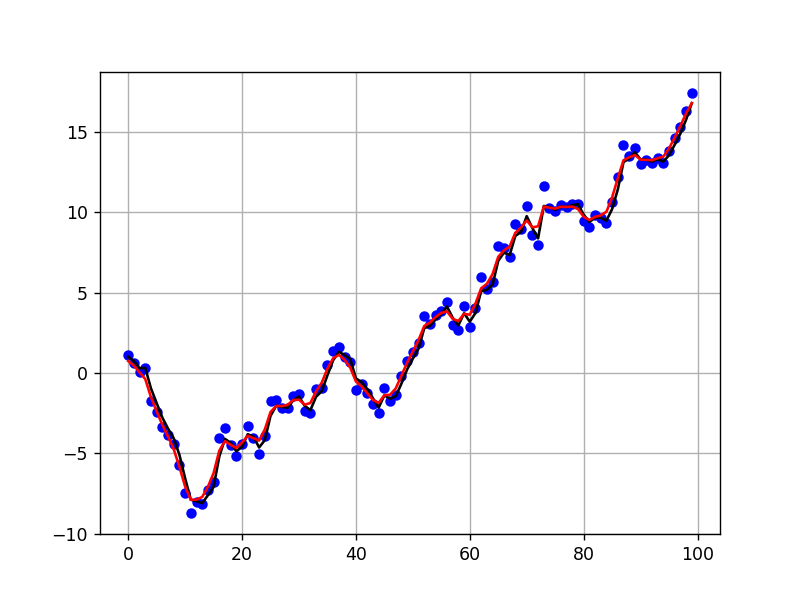

In [5]:
plt.figure()

plt.plot(y, 'bo', ms=5)
plt.plot(res['x'], 'k-')
plt.plot(res_smo['x'], 'r-')
plt.grid(True)
plt.show()

In [6]:
res['loglike']

316.90269724617207

In [7]:
samps = kf.sample(res, M, Q, nsamples=10)

<IPython.core.display.Javascript object>


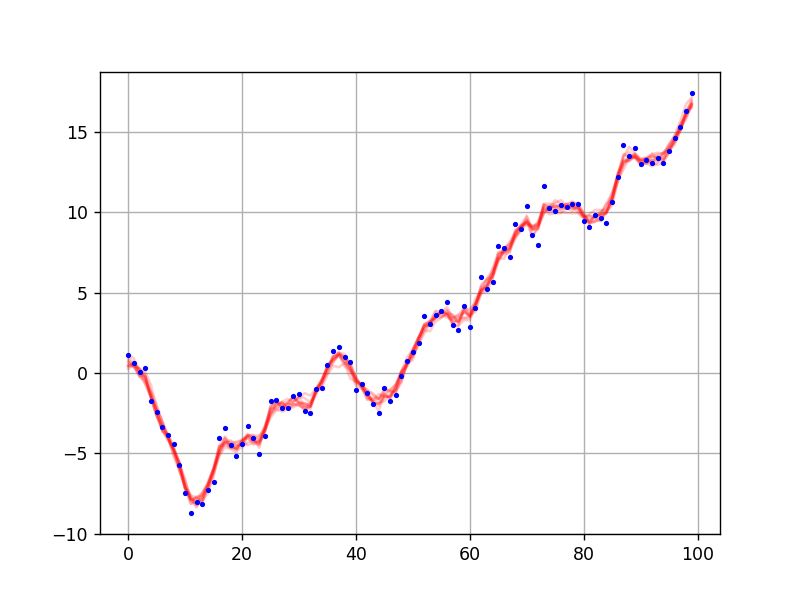

In [8]:
plt.figure()

plt.plot(np.array(samps).T, 'r-', alpha=0.2)
plt.plot(y, 'bo', ms=2)

plt.grid(True)
plt.show()